In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
%run -m Tetra_density
geo_data = gpd.read_file('TERRESTRIAL_MAMMALS/TERRESTRIAL_MAMMALS.shp').to_crs("EPSG:6933")

/home/dan/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.6.2-CAPI-1.10.2 4d2925d6) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
mammals_df = pd.read_csv('combined_dataset.csv')
mammals_df = mammals_df[mammals_df.label=='Entire range'][['binomial']]
# mammals_df = mammals_df.iloc[0:2]
mammals_df_geo = gpd.GeoDataFrame(mammals_df.merge(geo_data, on = 'binomial', how = 'left'))
mammals_df_geo = mammals_df_geo.dissolve(by='binomial')

In [28]:
path = 'shp_files/'
annual_mean_temp_str = 'data/annual_mean_temp_projected.tif'
prec_warmest_quarter_str = 'data/prec_warmest_quarter_projected.tif'
temp_seasonality_str = 'data/temp_seasonality_projected.tif'
npp_str = 'data/npp_projected.tif'
prec_seasonality_str = 'data/prec_seasonality_projected.tif'
stat = "mean"
spatial_res_grid = 20000
spatial_res = 100*10**6

In [32]:
mammals_df_geo.apply(get_gridded_data, axis =1)
# mammals_df_geo.shape

/home/dan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Acerodon_jubatus done


/home/dan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Acinonyx_jubatus done


binomial
Acerodon jubatus    None
Acinonyx jubatus    None
dtype: object

In [26]:
# # annual_mean_temp = rasterio.open('data/annual_mean_temp_projected.tif')
# # # npp = rasterio.open('data/npp_geotiff.tif')
# # prec_warmest_quarter = rasterio.open('data/prec_warmest_quarter_projected.tif')
# # temp_seasonality = rasterio.open('data/temp_seasonality_projected.tif')
# # show(annual_mean_temp, cmap='terrain')
# # show(prec_warmest_quarter, cmap='terrain')
# # show(temp_seasonality, cmap='terrain')
# grid.plot(ec = 'k')
# grid.plot(column='prec_warmest_quarter')
# npp = rasterio.open('data/npp_geotiff.tif')
# show(npp, cmap='terrain')

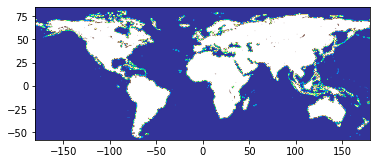

<AxesSubplot:>